# Machine Learning
# Data Preprocessing

## Feature Scaling, Normalization

# Dimensionality reduction
## PCA LDA kernel

## Data cleaning

Первый этап преобработки данных – data cleaning. Чаще всего его делают в ручную. Основаня задача этого этапа, выявить те проблемы, которые мешают нашему алгоритму выполнять свою работу максимально эффективно, чтобы в последующих шагах Data preprocessing избавиться от этих проблем. Также  избавиться(в зависимости от задачи) от<i> выбросов </i>, т.е. тех примеров, которые потенциально могут испортить нашу hypothesis и при этом в целом, большой значимости нас не имеют.

Если сложно в ручную определить точно, от каких данных стоит избавиться, следует <i>прежде всего</i> попробовать запустить наш алгоритм как есть, без какой-либо обработки данных. Это как правило, помогает сразу определиться, как следуют изменить наши данные для эффективной работы алгоритма.

Если же запуск алгоритма как есть, выявил проблемы, но понимание, того куда дальше двигаться не пришло. Можно использовать специальные алгоритмы для анализа данных. Например <b>Anomaly Detection algorithm</b>


<<Возможно рассказать про anomaly detection algorithm>>

## Data integration 

Задача проста, но важна. Необходимо правильно соединить данные из разных источников, и составить итоговое общее хранилизе данных <b>(Data wharehouse)</b>

## Data transformation 
Наверное самое важный и самый часто используемый процесс. Именно из-за отсутвия этого этапа в процессе разработки, у большинства начинающих специалистов возникают проблемы, и, стоит отметить, их причина не очевидна.

Основная предпосылка использования data transformation – медленное обучение алгоритма.


### Feature normalization

Where μi is the average of all the values for feature (i) and si is the range of values (max - min), or si is the standard deviation.

Для того чтобы наш алгоритм обучался максимально быстро, необходимо чтобы все наши входные значения были примерно в одном диапазоне.  Это происходит потому что наши веса $ w $ будует именьшатся быстро на небольших диапазонах и медлено на больших. И таким образом будет колебаться очень медленно пока в итоге мы не придем в минимум(напомню, что это в случае неравномерно распределенных данных).

Способ предотвратить это – изменить диапазоны наших входных данных. В идеале сделать их вот такими:
$$
-1 ≤ x_j ≤ 1 \\
or \\
-0.5 ≤ x_j ≤ 0.5
$$
Необходимо помнить, что это не точные диапазоны, нам неободимо <b>ускорить</b> обучение нашей модели, а не тратить много времени для этой обработки. Поэтому ничего сташного если наши данные будут примерно в этом диапозоне.

Существуют два метода которые способны помочь нам с этой задачей, это <b>feature scaling </b>и<b> mean normalization</b> вместе их еще называют <b> Feature normalization</b>. <b>Feature scaling </b> включает в себя деление входных значений на ранг(диапазон, т.е. разницу между максимальным и минимальным элементом) этого признака, в итоге мы получаем новый ранг, близкий к 1. <b>Mean normalization</b> включает в себя вычитание среднего значения среди входных значений каждого признака из каждого значения входной переменной этого признака, представленной этим признаком. В результате мы получаем, новое среднее значение для входной переменной приблизительно равное 0.

Вместе два эти метода можно объеденить следующим образом:
$$ 
    x_i := \frac{x_i - \mu_i}{s_i}
$$
Где $\mu_i$ среднее отклонение для $i^{го}$ признака, а $s_i$ ранг значений ($max - min$) или $s_i$ может быть также стандартным отклонением.(формула для стандартного отклонения $ \sigma =  \sqrt{\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + (x_3 - \mu)^2 + ... + (x_N - \mu)^2 }{N}}$ )

Where $\mu_i$ average value for $i^{th}$ feature $x_i$, and $s_i$ – range ($max - min$) or Standart deviation ( formula sd – $ \sigma =  \sqrt{\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2 + (x_3 - \mu)^2 + ... + (x_N - \mu)^2 }{N}}$ )


## Data reduction

### Dimensionality reduction

Допустим мы выяснили, что в нашем test set много <b>избыточных</b> данных.          
Мы хотели бы уменьшить количество признаков. Как мы можем это сделать?
допустим некоторые 2 наших признакак выглядят таким образом.

Чтобы сделать это найдем 2 очень кореллирующих признаков между собой, нарисуем прямую которая максимально точно описывает наши 2 признака. и размещаем все наши прищнаки на этой прямой. тем самым мы уменьшили размерность из 2 в 1.

Допустим мы имеем 2 признака, длина - чего угодно, в сантиметрах и дюймах. Понятно, что такие признаки имеют практически полную корелляцию.

In [1]:
# подгрузим все небоходимые нам библиотеки
import matplotlib.pyplot as plt
import numpy as np
import random


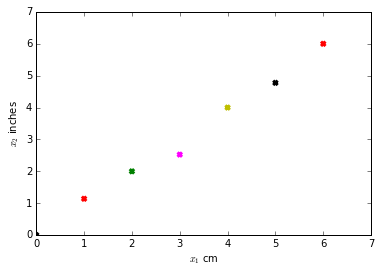

In [34]:
%matplotlib inline
# %matplotlib nbagg

random.seed(42)

x = np.array([i for i in np.arange(7)], dtype=np.float)
y = np.array([i for i in np.arange(7)], dtype=np.float)

i = 1
while i < 7:
    z = random.random()
    y[i] += (z - 0.5)
    i += 2


plt.scatter(x, y, color=['black', 'red', 'green', 'magenta', 'y'], marker='x', linewidths='3')



plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('$x_1$ cm')
plt.ylabel('$x_2$ inches')
plt.savefig('1.png', dpi=200)
plt.show()




[ 0.5  1.   2.   3.   4.   5.   6.   6.5]


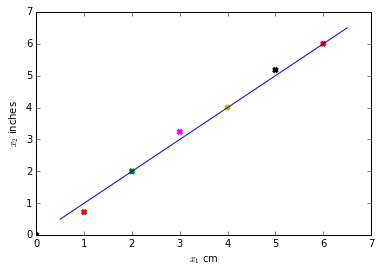

In [35]:
x = np.array([i for i in np.arange(7)], dtype=np.float)
y = np.array([i for i in np.arange(7)], dtype=np.float)

i = 1
while i < 7:
    z = random.random()
    y[i] += (z - 0.5)
    i += 2
plt.scatter(x, y, color=['black', 'red', 'green', 'magenta', 'y'], marker='x', linewidths='3')

x[0] = 0.5
x = np.append(x, 6.5)
plt.plot(x, x, 'b')
print(x)

plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('$x_1$ cm')
plt.ylabel('$x_2$ inches')
plt.savefig('2.png', dpi=200)
plt.show()

[ 0.5  1.   2.   3.   4.   5.   6.   6.5]


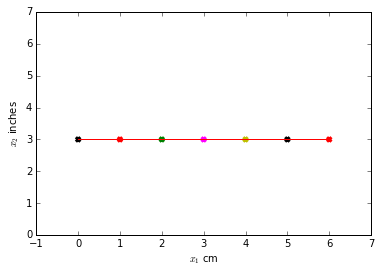

In [33]:
x = np.array([i for i in np.arange(7)], dtype=np.float)
y = np.array([i for i in np.arange(7)], dtype=np.float)

i = 1
while i < 7:
    z = random.random()
    y[i] += (z - 0.5)
    i += 2
plt.scatter(x, np.array([3,3,3,3,3,3,3]), color=['black', 'red', 'green', 'magenta', 'y'], marker='x', linewidths='3')

plt.plot(x, np.array([3,3,3,3,3,3,3]), 'r')

x[0] = 0.5
x = np.append(x, 6.5)

print(x)

plt.xlim(-1, 7)
plt.ylim(0, 7)
plt.xlabel('$x_1$ cm')
plt.ylabel('$x_2$ inches')
plt.savefig('3.png', dpi=200)
plt.show()

<IPython.core.display.Javascript object>


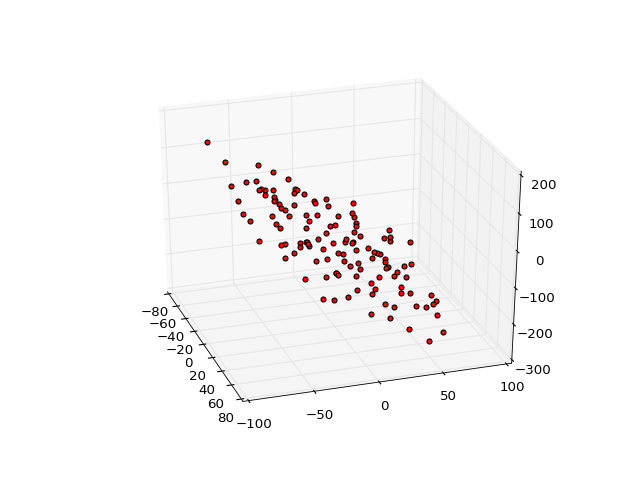

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random




fig = plt.figure('5')
ax = fig.add_subplot(111, projection='3d')

# x + 2y + z = 3 -> z = 3 - x - 2y

for i in range(-20, 21, 3):
    dx = i * 2 * (random.random() - 2)
    for j in range(-20, 21, 5):
        dy = j * 2 * (random.random() - 2)
        dz = 3 - dx - 2*dy + 50 * (random.random() - 2)
        ax.scatter(dx, dy, dz, c='r', marker='o')

plt.show()


<IPython.core.display.Javascript object>


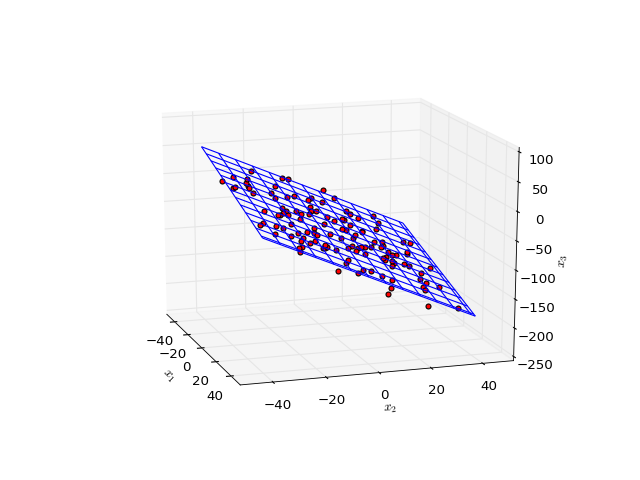

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np

random.seed(42)
fig = plt.figure('7')
ax = fig.add_subplot(111, projection='3d')

# x + 2y + z = 3 -> z = 3 - x - 2y

for i in range(-20, 21, 3):
    dx = i * (random.random() - 2)
    for j in range(-20, 21, 5):
        dy = j * (random.random() - 2)
        dz = 3 - dx - 2*dy + 50 * (random.random() - 2)
        ax.scatter(dx, dy, dz, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

x = np.array(np.linspace(-40, 41))
y = x
X, Y = np.meshgrid(x, y)

Z = 3 - X - 2*Y - 68
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
plt.show()


<IPython.core.display.Javascript object>


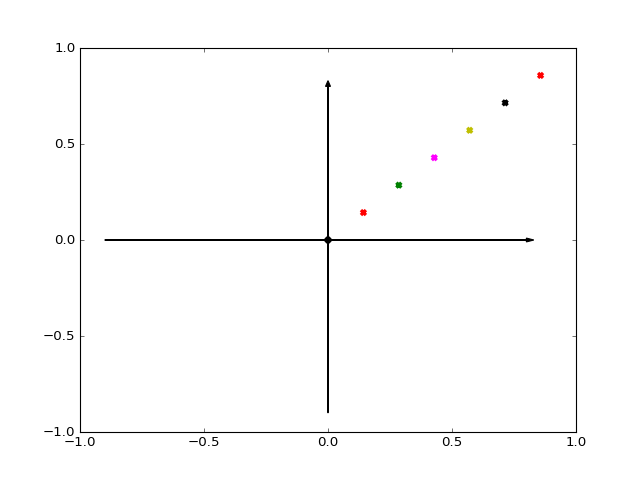

(-1, 1)

In [29]:
# plt.axhline(0, color='black', xmax=0.9)
# plt.axvline(0, color='black')
plt.arrow(-0.9,0,1.7,0, color='black')
plt.arrow(0, -0.9, 0, 1.7 , color='black')

x = np.array()
y = np.array([i / 7.0 for i in np.arange(7)], dtype=np.float)

while i < 7:
    z = random.random()
    y[i] += (z - 0.5)
    i += 2
plt.scatter(x, y, color=['black', 'red', 'green', 'magenta', 'y'], marker='x', linewidths='3')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

Зачем оно нам надо?

Делая Dimensionality reduction мы освобождаем память в компьютере и ускоряем наш алгоритм обучения.

## Visualization 

$$ J(w) $$
$$ w_1 $$
$$ w_2 $$
$ x_1 = \frac{size(m^2) - 1000}{2000} $           
$ x_2 = \frac{bedooms - 2}{5} $

$$
 R^2 \to R^1 $$
 
 
$$ R^3 \to R^2 $$

$ f: R^n \to R^n $                 
$ A(x) = Ax = x' $            
$ Ax = \lambda x $

$$ S_i = \sum_{x \in D_i}^{n} (x - \mu_i)(x - \mu_i)^T $$
$$ \mu_i = \frac{\sum_{x \in D_i}^{n} x}{m}$$

$$ S_B = \sum_{i = 1}^n N_i (\mu_i - \mu)(\mu_i - \mu)^T $$

# Generating some 3-dimensional sample data

In [46]:
import numpy as np
import numpy.random
np.random.seed(2342344218) # random seed for consistency


mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

# implementing PCA

Populating the interactive namespace from numpy and matplotlib


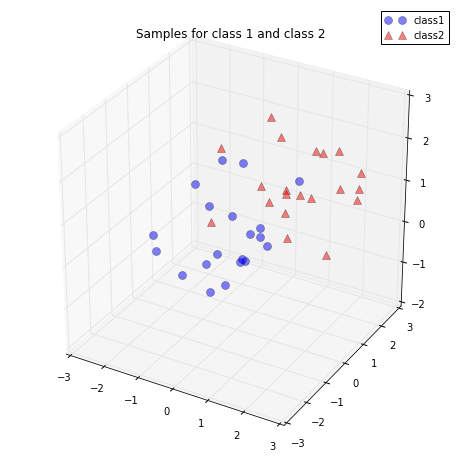

In [57]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')
plt.savefig('PCA_1.png', dpi=200)
plt.show()

# 1. Taking the whole dataset ignoring the class labels

In [48]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

# 2. Computing the d-dimensional mean vector

In [49]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.49888885]
 [ 0.42918732]
 [ 0.76854895]]


# 3. Computing the Scatter Matrix

In [50]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 53.6788665   20.37642776  17.76920267]
 [ 20.37642776  49.73077863  11.87197376]
 [ 17.76920267  11.87197376  34.36532162]]


# 4. Computing eigenvectors and corresponding eigenvalues

In [51]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.69249425]
 [-0.59408177]
 [-0.40929031]]
Eigenvalue 1 from scatter matrix: 81.66180882490045
----------------------------------------
Eigenvector 2: 
[[-0.51969396]
 [ 0.01730165]
 [ 0.85417729]]
Eigenvalue 2 from scatter matrix: 23.7947495235757
----------------------------------------
Eigenvector 3: 
[[ 0.50036976]
 [-0.80421857]
 [ 0.32072201]]
Eigenvalue 3 from scatter matrix: 32.318408405803495
----------------------------------------


## Visualizing the eigenvectors

Populating the interactive namespace from numpy and matplotlib


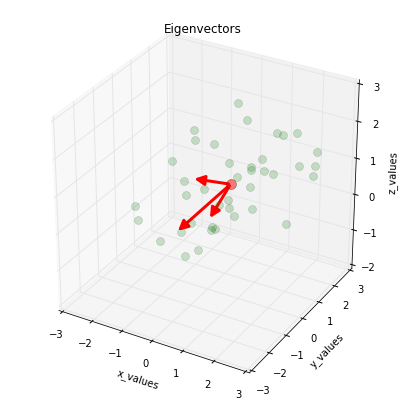

In [58]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.savefig('PCA_2.png', dpi=200)

plt.show()

# 5.1. Sorting the eigenvectors by decreasing eigenvalues

In [53]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

81.6618088249
32.3184084058
23.7947495236


# Choosing k eigenvectors with the largest eigenvalues

In [54]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.69249425  0.50036976]
 [-0.59408177 -0.80421857]
 [-0.40929031  0.32072201]]


In [61]:
print('Variance explained:\n')
eigv_sum = sum(eig_val_sc)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 59.27%
eigenvalue 2: 23.46%
eigenvalue 3: 17.27%


# 6. Transforming the samples onto the new subspace

In [55]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

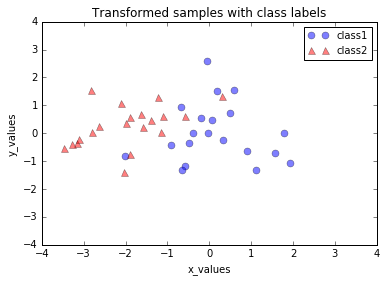

In [59]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.savefig('PCA_3.png', dpi=200)

plt.show()